In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [5]:
df = pd.read_csv("Wage.csv")

In [6]:
df.head()

,Year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [7]:
X = df[['age']]
y = df.wage

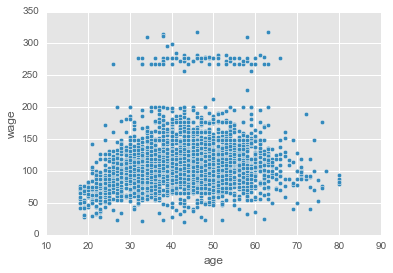

In [11]:
df[['age' , 'wage']].plot(kind = 'scatter' , x = 'age' , y = 'wage')

In [16]:
df['age_4'] = df.age**4
df['age_3'] = df.age**3
df['age_2'] = df.age**2

In [17]:
model = smf.ols(formula = 'wage ~ age + age_2 + age_3 + age_4 ' , data = df).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 14 Aug 2016   Prob (F-statistic):           2.77e-57
Time:                        06:27:54   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -184.1542     60.040     -3.067      0.002      -301.879   -66.430
age           21.2455      5.887      3.609      0.000         9.703    32.788
age_2         -0.5639      0.206     -2.736      0.006        -0.968    -0.160
age_3          0.0068      0.003      2.221      0.026         0.001     0.013
age_4      -3.204e-05   1.64e-05     -1.952      0.051     -6.42e-05  1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
max(df.age) - min(df.age)

62

In [21]:
X = df[['age' , 'age_2' , 'age_3' , 'age_4']]
y = df.wage

In [22]:
model_sk = linear_model.LinearRegression().fit(X,y)

In [28]:
y_hat = model_sk.predict(X)
df['y_hat'] = y_hat

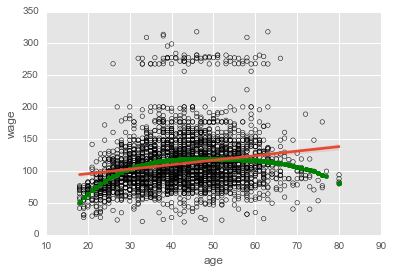

In [53]:
plt.scatter(x = df.age , y = df.wage , color = 'grey' , facecolor='None', edgecolor='k')
plt.scatter(x = df.age , y = df.y_hat , color = 'green')
sns.regplot(x = 'age' , y = 'wage'  , data =  df , scatter = False , truncate = True)


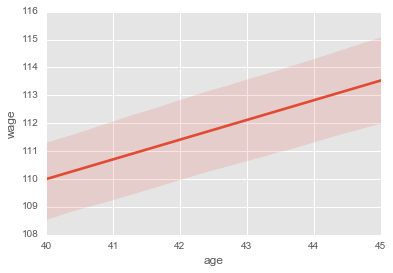

In [54]:
df.head()

,Year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_4,age_3,age_2,y_hat
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,104976,5832,324,51.931450
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,331776,13824,576,84.476756
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,4100625,91125,2025,119.325985
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,3418801,79507,1849,118.792097
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,6250000,125000,2500,119.570131


In [56]:
df['age_5'] = df.age**5

In [60]:
# Checking for ANOVA
from statsmodels.stats.api import anova_lm
model_1 = smf.ols(formula = 'wage ~ age' , data = df).fit()
model_2 = smf.ols(formula = 'wage ~ age_2' , data = df).fit()
model_3 = smf.ols(formula = 'wage ~ age_3' , data = df).fit()
model_4 = smf.ols(formula = 'wage ~ age_4' , data = df).fit()
model_5 = smf.ols(formula = 'wage ~ age_5' , data = df).fit()

sm.stats.anova_lm(model_1, model_2, model_3, model_4, model_5)



,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2998.0,5.090138e+06,-0.0,-67921.752323,inf,NaN
2,2998.0,5.142564e+06,-0.0,-52426.196513,inf,NaN
3,2998.0,5.178704e+06,-0.0,-36139.576938,inf,NaN
4,2998.0,5.201222e+06,-0.0,-22517.977545,inf,NaN


In [66]:
df['y_hat_4'] = np.nan

In [69]:
X_4 = df[['age_4']]
y = df.wage
model_degree_4 = linear_model.LinearRegression().fit(X_4 , y )
df.y_hat_4 = model_degree_4.predict(X_4)

In [70]:
df['is_more_250'] = False
df.loc[(df.wage > 250) ,'is_more_250' ] = True

In [71]:
df.is_more_250.value_counts()

False    2921
True       79
Name: is_more_250, dtype: int64

In [72]:
df.is_more_250 = 1*df.is_more_250

In [73]:
df.is_more_250.value_counts()

0    2921
1      79
Name: is_more_250, dtype: int64

# Checking splines

In [74]:
from scipy import interpolate


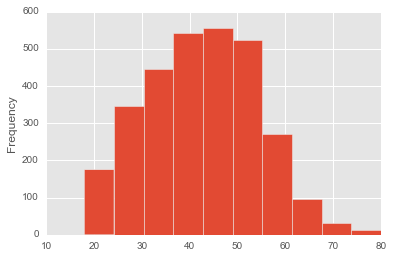

In [87]:
df.age.plot(kind = 'hist')

In [89]:
df['age'] = pd.to_numeric(df.age)
y = pd.to_numeric(df.wage)
tck = interpolate.interp1d(df.age, y)
y_hat_new = tck(df.age)

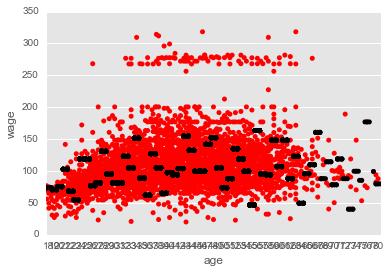

In [99]:
plt.plot(figsize = (20,20))
sns.swarmplot(df.age , y , color = 'red' )
sns.swarmplot(df.age , y_hat_new , color = 'black' )


In [103]:
X = df[['age' , 'wage']].sort_index()

In [109]:
X = X.sort('age')

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [111]:
x = X.age
y = X.wage

In [113]:
multi_spline = interpolate.splrep(x , y  )

In [125]:
multi_spline[0]

array([ 18.,  18.,  18., ...,  80.,  80.,  80.])

In [117]:
y_hat_spline = interpolate.splev(x , multi_spline)

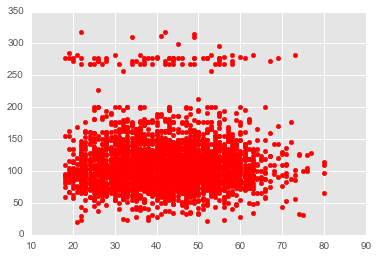

In [120]:
plt.plot(figsize = (20,20))
plt.scatter(df.age , y , color = 'red' )


In [126]:
pred = pd.DataFrame({'X':multi_spline[0]})

In [128]:
y_hat_spline = interpolate.splev(pred.X , multi_spline)

In [129]:
print y_hat_spline

[ nan  nan  nan ...,  nan  nan  nan]
